In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
df_m4=pd.read_csv("week2_result.csv")
df_m4

,Date,Pnb,upper,lower
0,2017-05-15,166.80,NaN,NaN
1,2017-05-16,174.15,NaN,NaN
2,2017-05-17,165.05,NaN,NaN
3,2017-05-18,158.50,NaN,NaN
4,2017-05-19,155.20,NaN,NaN
...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017
490,2019-05-08,83.95,93.474034,81.683108
491,2019-05-09,84.25,91.795738,81.989976
492,2019-05-10,86.25,89.958521,82.891479


In [184]:
df_m4['Mid'] = (df_m4['upper']+df_m4['lower'])/2
df_m4

,Date,Pnb,upper,lower,Mid
0,2017-05-15,166.80,NaN,NaN,NaN
1,2017-05-16,174.15,NaN,NaN,NaN
2,2017-05-17,165.05,NaN,NaN,NaN
3,2017-05-18,158.50,NaN,NaN,NaN
4,2017-05-19,155.20,NaN,NaN,NaN
...,...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017,88.250000
490,2019-05-08,83.95,93.474034,81.683108,87.578571
491,2019-05-09,84.25,91.795738,81.989976,86.892857
492,2019-05-10,86.25,89.958521,82.891479,86.425000


In [185]:
df_m4 = df_m4.dropna()
df_m4

,Date,Pnb,upper,lower,Mid
13,2017-06-01,151.90,171.662353,137.344790,154.503571
14,2017-06-02,153.05,169.154565,137.888292,153.521429
15,2017-06-05,153.80,162.284631,141.851083,152.067857
16,2017-06-06,149.50,157.974249,143.940037,150.957143
17,2017-06-07,152.35,156.130289,144.905425,150.517857
...,...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017,88.250000
490,2019-05-08,83.95,93.474034,81.683108,87.578571
491,2019-05-09,84.25,91.795738,81.989976,86.892857
492,2019-05-10,86.25,89.958521,82.891479,86.425000


In [186]:
df_m4['upper'] = df_m4['upper'].fillna(0)
df_m4['lower'] = df_m4['lower'].fillna(0)
df_m4['Pnb'] = df_m4['Pnb'].fillna(0)
df_m4['Mid'] = df_m4['Mid'].fillna(0)
df_m4

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Date,Pnb,upper,lower,Mid
13,2017-06-01,151.90,171.662353,137.344790,154.503571
14,2017-06-02,153.05,169.154565,137.888292,153.521429
15,2017-06-05,153.80,162.284631,141.851083,152.067857
16,2017-06-06,149.50,157.974249,143.940037,150.957143
17,2017-06-07,152.35,156.130289,144.905425,150.517857
...,...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017,88.250000
490,2019-05-08,83.95,93.474034,81.683108,87.578571
491,2019-05-09,84.25,91.795738,81.989976,86.892857
492,2019-05-10,86.25,89.958521,82.891479,86.425000


In [187]:
def buy(df_m4):
    if df_m4['Pnb'] < df_m4['lower']:
        return "Buy"
    if df_m4['Pnb'] > df_m4['lower'] and df_m4['Pnb'] < df_m4['Mid']:
        return "Hold Buy/ Liquidate Short"
    if df_m4['Pnb'] > df_m4['Mid'] and df_m4['Pnb'] < df_m4['upper']:
        return "Hold Short/ Liquidate Buy"
    if df_m4['Pnb'] > df_m4['upper']:
        return "Short"
df_m4 = df_m4.assign(Call = df_m4.apply(buy, axis=1))
df_m4

,Date,Pnb,upper,lower,Mid,Call
13,2017-06-01,151.90,171.662353,137.344790,154.503571,Hold Buy/ Liquidate Short
14,2017-06-02,153.05,169.154565,137.888292,153.521429,Hold Buy/ Liquidate Short
15,2017-06-05,153.80,162.284631,141.851083,152.067857,Hold Short/ Liquidate Buy
16,2017-06-06,149.50,157.974249,143.940037,150.957143,Hold Buy/ Liquidate Short
17,2017-06-07,152.35,156.130289,144.905425,150.517857,Hold Short/ Liquidate Buy
...,...,...,...,...,...,...
489,2019-05-07,83.95,94.495983,82.004017,88.250000,Hold Buy/ Liquidate Short
490,2019-05-08,83.95,93.474034,81.683108,87.578571,Hold Buy/ Liquidate Short
491,2019-05-09,84.25,91.795738,81.989976,86.892857,Hold Buy/ Liquidate Short
492,2019-05-10,86.25,89.958521,82.891479,86.425000,Hold Buy/ Liquidate Short


In [188]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
train_X = df_m4[['upper','lower','Mid','Pnb']]
transfomed_label = le.fit_transform(df_m4[['Call']])
train_Y = transfomed_label.reshape(-1,1)

D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9064

In [190]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5489

In [191]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forests


0.7089

In [192]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5343

In [193]:
datanew = pd.read_csv('C:/Users/dell/Desktop/Mid_Cap/Mid_Cap/VOLTAS.csv')
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [194]:
datanew['%chg op_cl'] = ((datanew['Close Price'] - datanew ['Open Price'])/(datanew['Close Price']))*100
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.960982
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104058
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.115760
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.656363
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.336741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-1.305179
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-3.875835
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.017419
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,6.904577


In [195]:
datanew['%chg lw_hg'] = ((datanew['Close Price'] - datanew ['High Price'])/(datanew['Low Price']))*100
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.960982,-1.057894
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104058,-1.335036
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.115760,-1.123464
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.656363,-3.125757
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.336741,-1.009855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-1.305179,-1.667500
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-3.875835,-3.910419
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.017419,-1.160440
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,6.904577,-1.106565


In [196]:
datanew['%chg 5dymean'] = datanew['Close Price'].pct_change().dropna().rolling(5).mean()
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.960982,-1.057894,NaN
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104058,-1.335036,NaN
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.115760,-1.123464,NaN
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.656363,-3.125757,NaN
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.336741,-1.009855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-1.305179,-1.667500,-0.002474
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-3.875835,-3.910419,-0.008652
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.017419,-1.160440,-0.008939
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,6.904577,-1.106565,-0.007731


In [197]:
datanew['%chg 5dystd'] = datanew['Close Price'].pct_change().dropna().rolling(5).std()
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.960982,-1.057894,NaN,NaN
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104058,-1.335036,NaN,NaN
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.115760,-1.123464,NaN,NaN
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.656363,-3.125757,NaN,NaN
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.336741,-1.009855,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-1.305179,-1.667500,-0.002474,0.006699
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-3.875835,-3.910419,-0.008652,0.018902
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.017419,-1.160440,-0.008939,0.018805
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,6.904577,-1.106565,-0.007731,0.020024


In [198]:
datanew = datanew.dropna()
datanew

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,VOLTAS,EQ,22-May-2017,415.75,420.0,420.00,413.85,417.00,415.65,415.98,633783,2.636431e+08,17175,243815,38.47,-1.046554,-1.051105,-0.007499,0.017061
6,VOLTAS,EQ,23-May-2017,415.65,420.0,420.00,403.40,405.95,409.85,410.31,1795730,7.367989e+08,44062,523655,29.16,-2.476516,-2.516113,-0.010567,0.016431
7,VOLTAS,EQ,24-May-2017,409.85,428.0,450.80,423.10,447.15,446.50,443.90,17793994,7.898705e+09,167272,5533301,31.10,4.143337,-1.016308,0.008358,0.048110
8,VOLTAS,EQ,25-May-2017,446.50,451.0,484.00,443.20,476.15,474.75,462.79,6345884,2.936783e+09,71716,1250047,19.70,5.002633,-2.087094,0.028497,0.045138
9,VOLTAS,EQ,26-May-2017,474.75,470.1,501.75,470.10,499.75,498.50,494.63,7060217,3.492227e+09,72145,1747315,24.75,5.697091,-0.691342,0.037705,0.043556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.3,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-1.305179,-1.667500,-0.002474,0.006699
490,VOLTAS,EQ,08-May-2019,601.45,599.0,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-3.875835,-3.910419,-0.008652,0.018902
491,VOLTAS,EQ,09-May-2019,576.65,574.0,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.017419,-1.160440,-0.008939,0.018805
492,VOLTAS,EQ,10-May-2019,574.10,540.0,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,6.904577,-1.106565,-0.007731,0.020024


In [199]:
close = []
val = []
for value in datanew['Close Price'].iteritems():
    close.append(value[1])
for i in range(0,483):
    if close[i+1] > close[i]:
        val.append(1)
    else:
        val.append(-1)
datanew['Action'] = pd.DataFrame(val)
datanew = datanew.dropna()
datanew

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,VOLTAS,EQ,22-May-2017,415.75,420.00,420.00,413.85,417.00,415.65,415.98,633783,2.636431e+08,17175,243815,38.47,-1.046554,-1.051105,-0.007499,0.017061,1.0
6,VOLTAS,EQ,23-May-2017,415.65,420.00,420.00,403.40,405.95,409.85,410.31,1795730,7.367989e+08,44062,523655,29.16,-2.476516,-2.516113,-0.010567,0.016431,1.0
7,VOLTAS,EQ,24-May-2017,409.85,428.00,450.80,423.10,447.15,446.50,443.90,17793994,7.898705e+09,167272,5533301,31.10,4.143337,-1.016308,0.008358,0.048110,1.0
8,VOLTAS,EQ,25-May-2017,446.50,451.00,484.00,443.20,476.15,474.75,462.79,6345884,2.936783e+09,71716,1250047,19.70,5.002633,-2.087094,0.028497,0.045138,-1.0
9,VOLTAS,EQ,26-May-2017,474.75,470.10,501.75,470.10,499.75,498.50,494.63,7060217,3.492227e+09,72145,1747315,24.75,5.697091,-0.691342,0.037705,0.043556,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,VOLTAS,EQ,16-Apr-2019,621.75,624.95,628.25,622.20,627.00,623.85,625.15,1235077,7.721080e+08,31959,623803,50.51,-0.176324,-0.707168,0.004754,0.003925,-1.0
479,VOLTAS,EQ,18-Apr-2019,623.85,625.15,626.90,609.50,614.00,614.85,615.74,986091,6.071789e+08,62432,398844,40.45,-1.675205,-1.977030,0.001556,0.009594,-1.0
480,VOLTAS,EQ,22-Apr-2019,614.85,614.15,616.00,608.30,611.00,611.90,611.35,642804,3.929779e+08,11645,193991,30.18,-0.367707,-0.674010,-0.001648,0.008120,-1.0
481,VOLTAS,EQ,23-Apr-2019,611.90,611.00,625.45,609.40,621.05,622.25,620.47,1218136,7.558160e+08,38818,404505,33.21,1.807955,-0.525107,0.000633,0.011522,1.0


In [200]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = datanew[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = datanew[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6234

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


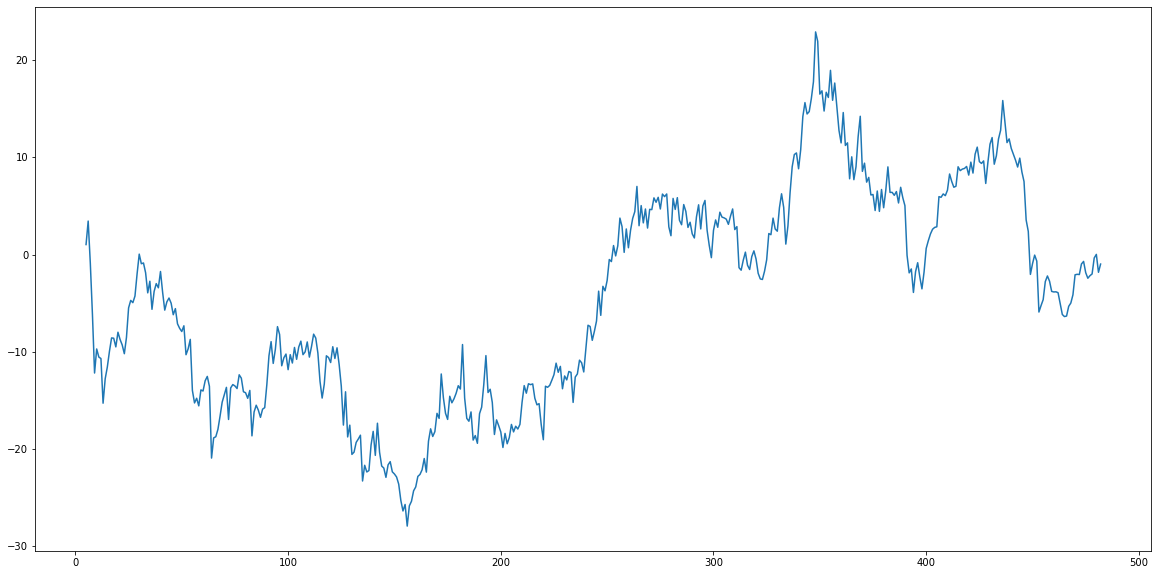

In [201]:
datanew['Net Cummulative Returns'] = (((datanew['Open Price'] - datanew['Close Price'])/(datanew['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(datanew['Net Cummulative Returns'])